<h1> user_experience_analysis</h1>

<h2> Imporing data and packages </h2>

Importing essential libraries

In [92]:
import pandas as pd
import numpy as np
import os
import warnings
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Suppressing warning messages

In [2]:
warnings.filterwarnings('ignore')

Setting file paths

In [3]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir)) # setting path to parent directory
scripts_dir = os.path.join(parent_dir,"scripts") # setting path to scripts directory
data_path = os.path.join(parent_dir,"data","teleco_clean_data.csv") # setting path to data directory

sys.path.insert(1, scripts_dir)

loading cleaning and summarizing scripts

In [4]:
from data_cleaning_functions import DataCleaner as Cleaner 
from data_summarizing_functions import DataSummarizer as Sumar

cleaner = Cleaner()
sumar = Sumar()

loading dataframes

In [5]:
df3= pd.read_csv(data_path)

In [6]:
sumar.summ_columns(df3)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,991,1.0,object,134709
1,Dur. (ms),0,0.0,float64,89525
2,MSISDN/Number,1066,1.0,object,106857
3,Avg RTT DL (ms),0,0.0,float64,2130
4,Avg RTT UL (ms),0,0.0,float64,722
5,Avg Bearer TP DL (kbps),0,0.0,float64,41753
6,Avg Bearer TP UL (kbps),0,0.0,float64,14528
7,TCP DL Retrans. Vol (MB),0,0.0,float64,54399
8,TCP UL Retrans. Vol (MB),0,0.0,float64,35121
9,Activity Duration DL (ms),0,0.0,float64,102561


In [7]:
cleaner.fill_missing_by_mode(df3)
sumar.summ_columns(df3)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Bearer Id,0,0.0,object,134708
1,Dur. (ms),0,0.0,float64,89525
2,MSISDN/Number,0,0.0,object,106856
3,Avg RTT DL (ms),0,0.0,float64,2130
4,Avg RTT UL (ms),0,0.0,float64,722
5,Avg Bearer TP DL (kbps),0,0.0,float64,41753
6,Avg Bearer TP UL (kbps),0,0.0,float64,14528
7,TCP DL Retrans. Vol (MB),0,0.0,float64,54399
8,TCP UL Retrans. Vol (MB),0,0.0,float64,35121
9,Activity Duration DL (ms),0,0.0,float64,102561


In [24]:
grouping_lis = ["MSISDN/Number"]
aggr_lis = ["Handset Type", "Avg RTT DL (ms)", "Avg RTT UL (ms)", "Avg Bearer TP DL (kbps)", "Avg Bearer TP UL (kbps)", "TCP DL Retrans. Vol (MB)", "TCP UL Retrans. Vol (MB)" ] 
metric_lis = [pd.Series.mode, "sum","sum", "sum", "sum", "sum", "sum"]
col_names = ["Handset", "RTT DL (ms)", "RTT UL (ms)", "TP DL (kbps)", "TP UL (kbps)", "TCP DL Retrans (MB)", "TCP UL Retrans (MB)"]


aggr_df_2 = sumar.find_agg(df3, grouping_lis, aggr_lis, metric_lis, col_names)

def extractHand(element):
    if type(element) is np.ndarray:
        return str(element[0])
    else:
        return element

aggr_df_2['Handset'] = aggr_df_2.apply(lambda row : extractHand(row["Handset"]), axis = 1)


 

removing any outlier

In [55]:
aggr_df_2 = cleaner.removeOutliers(aggr_df_2, ["RTT DL (ms)", "RTT UL (ms)", "TP DL (kbps)", "TP UL (kbps)", "TCP DL Retrans (MB)", "TCP UL Retrans (MB)"])

In [56]:
sumar.combineColumns(aggr_df_2, "RTT DL (ms)", "RTT UL (ms)", "RTT_total")
sumar.combineColumns(aggr_df_2, "TP DL (kbps)", "TP UL (kbps)", "TP_total")
sumar.combineColumns(aggr_df_2, "TP DL (kbps)", "TP UL (kbps)", "TP_total")
sumar.combineColumns(aggr_df_2, "TCP DL Retrans (MB)", "TCP UL Retrans (MB)", "TCP_total")

sumar.summ_columns(aggr_df_2)


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,MSISDN/Number,0,0.0,object,93899
1,Handset,0,0.0,object,1125
2,RTT DL (ms),0,0.0,float64,176
3,RTT UL (ms),0,0.0,float64,631
4,TP DL (kbps),0,0.0,float64,30204
5,TP UL (kbps),0,0.0,float64,11840
6,TCP DL Retrans (MB),0,0.0,float64,33022
7,TCP UL Retrans (MB),0,0.0,float64,22453
8,RTT_total,0,0.0,float64,741
9,TP_total,0,0.0,float64,31455


Listing the top TCP, RTT and TP values

In [57]:
sumar.show_N_per_col(aggr_df_2, "MSISDN/Number", ["RTT_total", "TP_total", "TCP_total"], 10)


Top 10 customers based onRTT_total

            MSISDN/Number  RTT_total
37288   33,659,778,586.00     7158.0
17135   33,633,298,261.00     5660.0
94140   33,761,092,970.00     5453.0
69219   33,668,497,162.00     4759.0
18352   33,636,368,478.00     4114.0
103349  33,778,078,390.00     3994.0
60162   33,665,482,928.00     3940.0
55723   33,664,279,730.00     3108.0
48160   33,662,361,196.00     3092.0
39757   33,660,358,375.00     3079.0

Top 10 customers based onTP_total

           MSISDN/Number  TP_total
60764  33,665,658,364.00  530353.0
31727  33,658,581,169.00  522740.0
74586  33,672,505,906.00  514522.0
26412  33,650,809,363.00  510685.0
59833  33,665,394,082.00  470526.0
9341   33,619,642,365.00  450213.0
44797  33,661,587,266.00  433923.0
85050  33,698,355,846.00  429922.0
59184  33,665,225,282.00  419435.0
92055  33,760,184,097.00  419201.0

Top 10 customers based onTCP_total

           MSISDN/Number    TCP_total
31966  33,658,638,625.00  5165.856986
49884  33,662,753,219.

showing the bottom 10 RTT, TP, and TCP

In [58]:
sumar.show_N_per_col(aggr_df_2, "MSISDN/Number", ["RTT_total", "TP_total", "TCP_total"], 10, "bottom")


Top 10 customers based onRTT_total

           MSISDN/Number  RTT_total
28879  33,652,982,188.00        0.0
44749  33,661,575,382.00        0.0
39067  33,660,204,450.00        2.0
83397  33,695,045,499.00        4.0
36040  33,659,493,541.00        5.0
69663  33,668,619,895.00        6.0
21981  33,647,679,481.00        8.0
3883   33,610,846,366.00        9.0
74435  33,672,196,893.00        9.0
17864  33,634,684,770.00       10.0

Top 10 customers based onTP_total

           MSISDN/Number  TP_total
48626  33,662,459,797.00       0.0
27068  33,650,957,457.00       0.0
66051  33,667,462,490.00       0.0
24369  33,650,346,934.00       0.0
23474  33,650,128,703.00       0.0
23045  33,650,034,044.00       0.0
69657  33,668,618,348.00       0.0
22894  33,650,000,334.00       0.0
71457  33,669,225,540.00       0.0
71500  33,669,241,058.00       0.0

Top 10 customers based onTCP_total

            MSISDN/Number  TCP_total
23473   33,650,128,412.00   0.000097
6360    33,614,777,138.00   0.00012

In [59]:
grouping_lis = ["Handset"]
aggr_lis = ["TP_total", "TCP_total", "RTT_total"] 
metric_lis = ["mean", "mean", "count"]
col_names = ["mean_TP", "mean_TCP", "user_count"]

handset_aggr_df = sumar.find_agg(aggr_df_2, grouping_lis, aggr_lis, metric_lis, col_names)


In [60]:
sumar.show_N_per_col(handset_aggr_df, "Handset", ["mean_TP", "mean_TCP", "user_count"], 10)


Top 10 customers based onmean_TP

                          Handset        mean_TP
933   Spa Condor Elect. Allure M2  168623.000000
365                Huawei Par-Lx9  144115.000000
580        New-Bund Technol. Thor  113444.500000
271              Huawei B715S-23C  111830.500000
579       New-Bund Technol. Mix 2  105211.000000
478                        Lg G6+  100135.000000
1122    Zyxel Communicat. Sbg3600   97351.000000
403                Huawei Y9 2019   91739.000000
1074   Xiaomi Communica. M1902F1G   85613.666667
504                       Lg-H860   84337.000000

Top 10 customers based onmean_TCP

                                        Handset    mean_TCP
485                                  Lg Lg-H635  905.063286
273                             Huawei Bln-Al10  329.174592
122         Asustek Asus Zenfone Selfie Zd551Kl  321.658306
178   Dynamic Tech Hol. D-Mobile I3 I5 I7 I8 I9  268.312679
19                       Apple iPad Pro (A1652)  117.330227
736                      Samsu

selecting features for k-means clustering

In [61]:
features = ["RTT_total", "TP_total", "TCP_total"]
selected_metrics = aggr_df_2[features]

creating normalized dataframe

In [62]:
x = selected_metrics.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

Checking if the mean is 0 and std is 1

In [63]:
np.mean(x), np.std(x), x.shape

(-2.2196814572710686e-17, 1.0, (93899, 3))

In [64]:
normalised_df = pd.DataFrame(x,columns=features)

In [83]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [84]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 1, 1, 1])

In [85]:
data_with_clusters = aggr_df_2.copy()
data_with_clusters['Clusters'] = identified_clusters 
sumar.summ_columns(data_with_clusters)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,MSISDN/Number,0,0.0,object,93899
1,Handset,0,0.0,object,1125
2,RTT DL (ms),0,0.0,float64,176
3,RTT UL (ms),0,0.0,float64,631
4,TP DL (kbps),0,0.0,float64,30204
5,TP UL (kbps),0,0.0,float64,11840
6,TCP DL Retrans (MB),0,0.0,float64,33022
7,TCP UL Retrans (MB),0,0.0,float64,22453
8,RTT_total,0,0.0,float64,741
9,TP_total,0,0.0,float64,31455


In [86]:
clus_count_df = sumar.find_agg(data_with_clusters, "Clusters",features, ["count", "count", "count"], ["User_count", "User_count", "User_count"])
clus_mean_df = sumar.find_agg(data_with_clusters, "Clusters", features, ["mean", "mean", "mean"], ["RTT_mean", "TP_mean", "TCP_mean"])


In [87]:
clus_count_df

,Clusters,User_count,User_count,User_count
0,0,15185,15185,15185
1,1,78319,78319,78319
2,2,280,280,280
3,3,115,115,115


<Figure size 432x288 with 0 Axes>

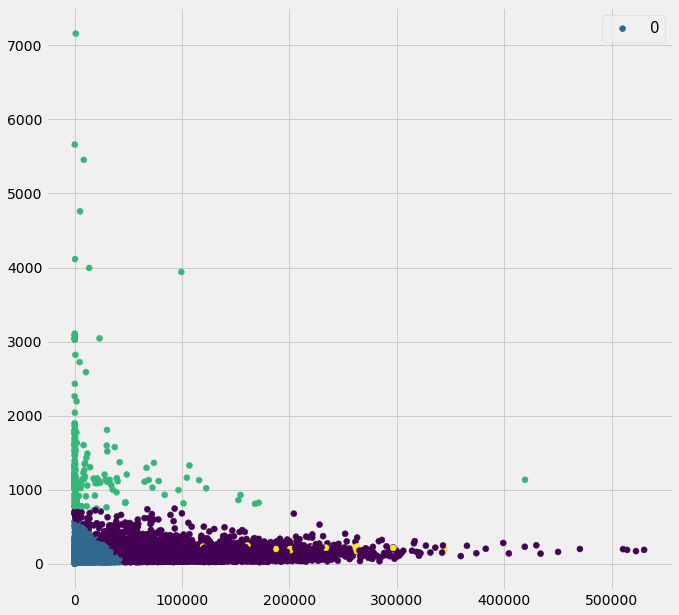

In [105]:
plt.figure()
plt.figure(figsize=(10,10))
plt.scatter(data_with_clusters['TP_total'], data_with_clusters['RTT_total'], c =data_with_clusters['Clusters'])

plt.legend([0,1,2],prop={'size': 15})
plt.show()

In [89]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(normalised_df)
    Sum_of_squared_distances.append(km.inertia_)

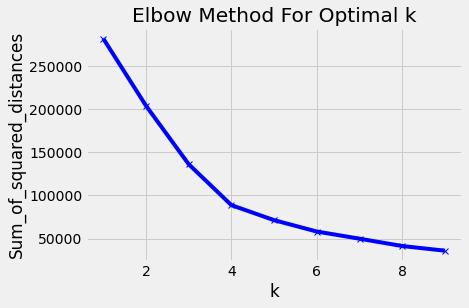

In [90]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

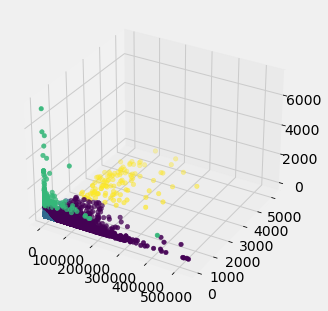

In [106]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_with_clusters['TP_total'],data_with_clusters['TCP_total'], data_with_clusters['RTT_total'], c =data_with_clusters['Clusters'])